# Working With The MIT-BIH Train Data Set

Link for the datasets - 
Train Set - https://drive.google.com/file/d/1NGzfEehfwuLEHA30TXrZD0KI5BaphfXo/view?usp=sharing
Test Set- https://drive.google.com/file/d/1MPdAD6v6PgcJ47cImB2SJ_tNFGELm1hw/view?usp=sharing

Importing necessarry libraries

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

Importing the Data

In [35]:
data = pd.read_csv('mitbih_train.csv',header = None)

In [36]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
data.shape

(87554, 188)

In [38]:
data.isna().sum()   #Checking For Null Values

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64

Conclusion - There is no null column avaialble in data

0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64
Available Types of Arrythmia


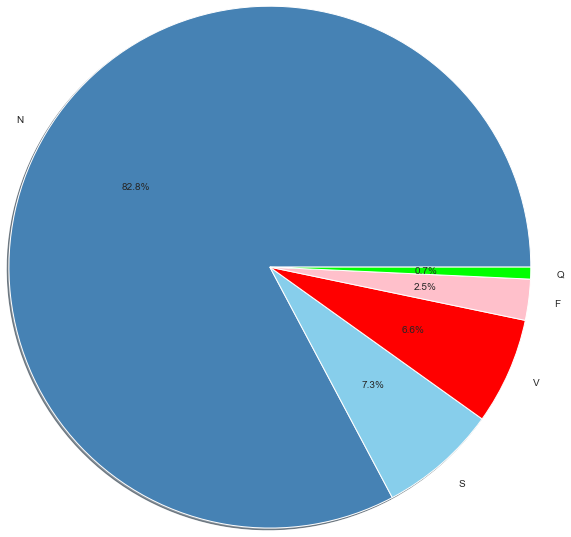

In [39]:
class_data= data[187].value_counts()
print(class_data)

print('Available Types of Arrythmia')

#Visualization

plt.pie(class_data,labels=['N','S','V','F','Q'],colors=['steelblue','skyblue','red','pink','lime'],shadow=True,autopct="%1.1f%%",radius=3)
plt.show()

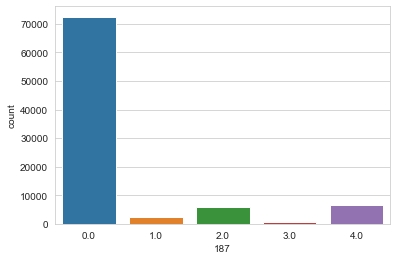

In [40]:
sns.countplot(x=187, data = data) 
plt.show()

Classes: N:0 , S:1, V:2, F:3, Q:4
N : Non-ecotic beats (normal beat) 
S : Supraventricular ectopic beats 
V : Ventricular ectopic beats 
F : Fusion Beats 
Q : Unknown Beats

Here this pie chart & bar graph easily shows how data is imbalanced. More than 80% data is in class 0. So, first, we have to balance the data in to get more precise predictions. After some try i have decided to choose the resample technique more than the class weights for the algorithms.
Now Balancing the data as the situation seems of Imbalanced Classification

In [41]:
from sklearn.utils import resample
df1=data[data[187]==1]
df2=data[data[187]==2]
df3=data[data[187]==3]
df4=data[data[187]==4]
df0=(data[data[187]==0]).sample(n=8000,random_state=0)

df1_sample=resample(df1,replace=True,n_samples=8000,random_state=0)
df2_sample=resample(df2,replace=True,n_samples=8000,random_state=0)
df3_sample=resample(df3,replace=True,n_samples=8000,random_state=0)
df4_sample=resample(df4,replace=True,n_samples=8000,random_state=0)

train_data=pd.concat([df0,df1_sample,df2_sample,df3_sample,df4_sample])

0.0    8000
4.0    8000
2.0    8000
3.0    8000
1.0    8000
Name: 187, dtype: int64
Available Types Of Arrythmia For Resampled Data


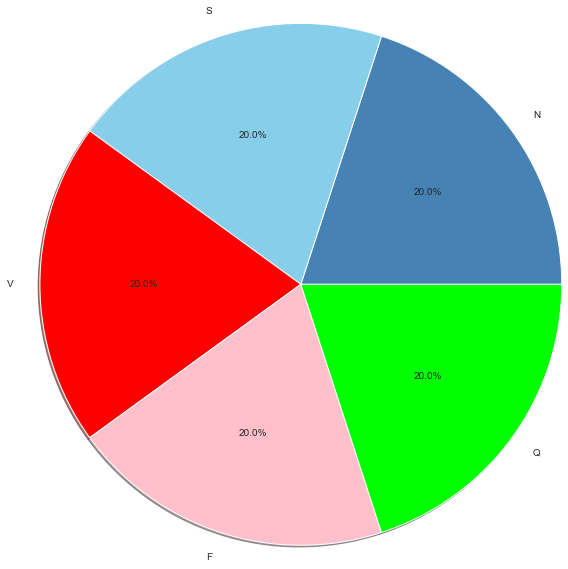

In [42]:
class_data= train_data[187].value_counts()
print(class_data)

print('Available Types Of Arrythmia For Resampled Data')
#Visualization
plt.pie(class_data,labels=['N','S','V','F','Q'],colors=['steelblue','skyblue','red','pink','lime'],shadow=True,autopct="%1.1f%%",radius=3)
plt.show()

Here is a plot of any random sample of hearbeat in each of the 5 class.

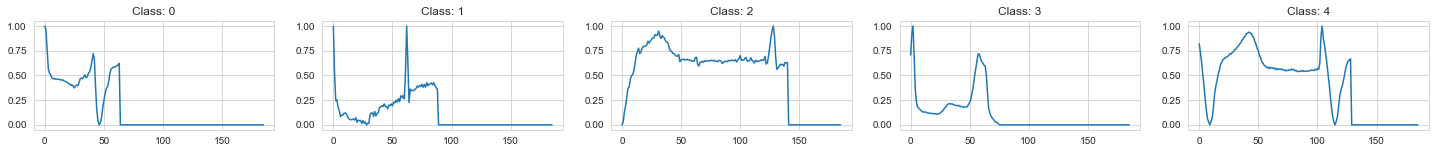

In [43]:
index = 0

fig, ax = plt.subplots(nrows = 1, ncols = 5, figsize=(25,2))

for i in range(5):
  ax[i].plot(train_data[train_data[187]==float(i)].sample(1).iloc[0,:186])
  ax[i].set_title('Class: '+str(i))

Train-Test Split

In [44]:
from sklearn.model_selection import train_test_split
X = train_data.drop([187],axis=1)
y = train_data[187]
X_train, X_test, y_train, y_test = train_test_split( X, y , test_size = 0.2 , random_state = 0)

In [45]:
X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

Building The Model

In [46]:
import tensorflow as tf

In [47]:
cnn=tf.keras.Sequential()

convolution

In [48]:
cnn.add(tf.keras.layers.Conv1D(filters=32,kernel_size=3,activation='relu',input_shape=(X_train.shape[1],1)))
cnn.add(tf.keras.layers.Conv1D(filters=64, kernel_size=3, padding='same', activation='relu')) 
cnn.add(tf.keras.layers.Conv1D(filters=128, kernel_size=5, padding='same', activation='relu'))    

Max Pooling

In [49]:
cnn.add(tf.keras.layers.MaxPool1D(pool_size=3,strides=2,padding = 'same'))
cnn.add(tf.keras.layers.Dropout(0.5))

Flatten

In [50]:
cnn.add(tf.keras.layers.Flatten())

Full Connection

In [51]:
cnn.add(tf.keras.layers.Dense(units=500,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=1000,activation='relu'))

Output Layer

In [52]:
cnn.add(tf.keras.layers.Dense(units=5,activation='softmax'))

Compilation

In [53]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Fitting Training Data

In [54]:
history=cnn.fit(X_train,y_train,epochs=8)

Epoch 1/8
1000/1000 [==============================] - 99s 99ms/step - loss: 0.3809 - accuracy: 0.85933s - loss: 0 - ETA:  - ETA: 0s - loss: 0.3810 - accura
Epoch 2/8
1000/1000 [==============================] - 101s 101ms/step - loss: 0.1676 - accuracy: 0.9392
Epoch 3/8
1000/1000 [==============================] - 96s 96ms/step - loss: 0.1077 - accuracy: 0.9613
Epoch 4/8
1000/1000 [==============================] - 106s 106ms/step - loss: 0.0817 - accuracy: 0.9713
Epoch 5/8
1000/1000 [==============================] - 100s 100ms/step - loss: 0.0615 - accuracy: 0.9786
Epoch 6/8
1000/1000 [==============================] - 104s 104ms/step - loss: 0.0578 - accuracy: 0.9802
Epoch 7/8
1000/1000 [==============================] - 102s 102ms/step - loss: 0.0453 - accuracy: 0.9851
Epoch 8/8
1000/1000 [==============================] - 102s 102ms/step - loss: 0.0413 - accuracy: 0.9862


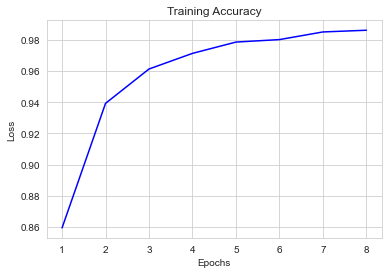

In [55]:
acc = history.history['accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, color='blue', label='Training acc')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

Predictions

In [56]:
y_pred = cnn.predict(X_test)
y_pred = [np.where(i == np.max(i))[0][0] for i in y_pred]

In [57]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print ("The Accuracy Score on test set is {:.2f}%".format(accuracy*100))

The Accuracy Score on test set is 98.04%


K-Fold Cross Validation

In [58]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [59]:
def build_model():
    cnn = tf.keras.models.Sequential([
        tf.keras.layers.Conv1D(filters=32,kernel_size=3,activation='relu',input_shape=(X_train.shape[1],1)),
        tf.keras.layers.Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'),
        tf.keras.layers.Conv1D(filters=128, kernel_size=5, padding='same', activation='relu'),   
        tf.keras.layers.MaxPool1D(pool_size=3,strides=2,padding = 'same'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=500,activation='relu'),
        tf.keras.layers.Dense(units=1000,activation='relu'),
        tf.keras.layers.Dense(units=5,activation='softmax')])
    cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    return cnn

CNN = build_model()

history = CNN.fit(X_train, y_train, epochs=1)

keras_clf = KerasClassifier(build_model)

accuracies = cross_val_score(estimator=keras_clf, scoring="accuracy", X=X_train, y=y_train, cv=5)

print(accuracies)

800/800 [==============================] - 80s 100ms/step - loss: 0.4147 - accuracy: 0.8447
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
800/800 [==============================] - 84s 105ms/step - loss: 0.4239 - accuracy: 0.8418
[0.92203125 0.92359375 0.91296875 0.923125   0.91125   ]


In [60]:
print("Overall Accuracy: {:.2f} %".format(accuracies.mean()*100))

Overall Accuracy: 91.86 %


So from K-Fold Cross Validation the robustness of the built model ia found with an accuracy ~ 92 %

# Working With The MIT-BIH Test Data Set

In [61]:
data_t = pd.read_csv('mitbih_test.csv',header = None)

In [62]:
data_t.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
data_t.shape

(21892, 188)

In [64]:
data_t.isna().sum()

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64

Conclusion - There is no null column avaialble in data_t

0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: 187, dtype: int64
Available Types Of Arrythmia


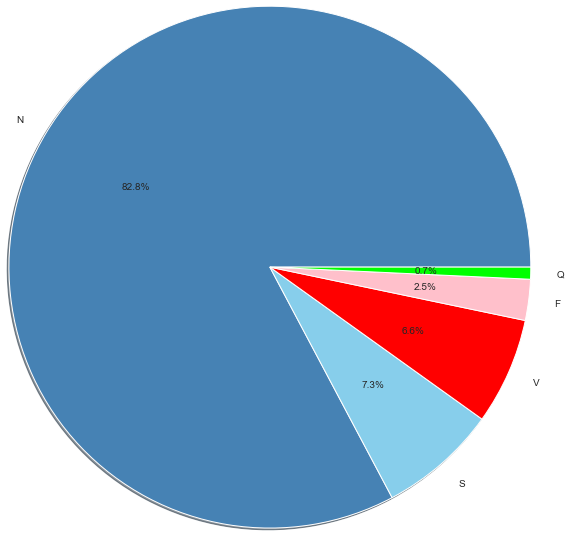

In [65]:
class_data_t= data_t[187].value_counts()
print(class_data_t)
print('Available Types Of Arrythmia')
#Visualization
plt.pie(class_data_t,labels=['N','S','V','F','Q'],colors=['steelblue','skyblue','red','pink','lime'],shadow=True,autopct="%1.1f%%",radius=3)
plt.show()

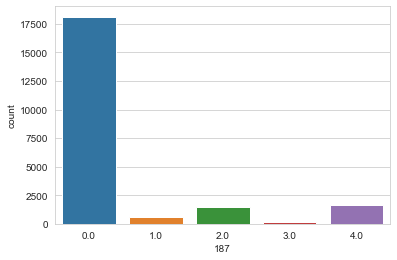

In [66]:
sns.countplot(x=187, data = data_t) 
plt.show()

Classes: N:0 , S:1, V:2, F:3, Q:4 N : Non-ecotic beats (normal beat) S : Supraventricular ectopic beats V : Ventricular ectopic beats F : Fusion Beats Q : Unknown Beats

Here this pie chart & bar graph easily shows how data is imbalanced. More than 80% data is in class 0. So, first, we have to balance the data in to get more precise predictions. After some try i have decided to choose the resample technique more than the class weights for the algorithms. Now Balancing the data as the situation seems of Imbalanced Classification

In [67]:
from sklearn.utils import resample
df1=data_t[data_t[187]==1]
df2=data_t[data_t[187]==2]
df3=data_t[data_t[187]==3]
df4=data_t[data_t[187]==4]
df0=(data_t[data_t[187]==0]).sample(n=2000,random_state=0)

df1_sample=resample(df1,replace=True,n_samples=2000,random_state=0)
df2_sample=resample(df2,replace=True,n_samples=2000,random_state=0)
df3_sample=resample(df3,replace=True,n_samples=2000,random_state=0)
df4_sample=resample(df4,replace=True,n_samples=2000,random_state=0)

test_data=pd.concat([df0,df1_sample,df2_sample,df3_sample,df4_sample])

0.0    2000
4.0    2000
1.0    2000
2.0    2000
3.0    2000
Name: 187, dtype: int64
Available Types Of Arrythmia For Resampled Data


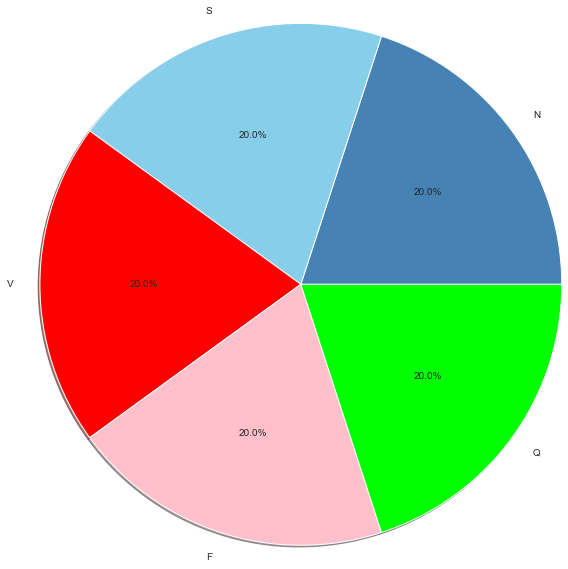

In [68]:
class_data_t= test_data[187].value_counts()
print(class_data_t)
print('Available Types Of Arrythmia For Resampled Data')
#Visualization
plt.pie(class_data_t,labels=['N','S','V','F','Q'],colors=['steelblue','skyblue','red','pink','lime'],shadow=True,autopct="%1.1f%%",radius=3)
plt.show()

Here is a plot of any random sample of hearbeat in each of the 5 class.

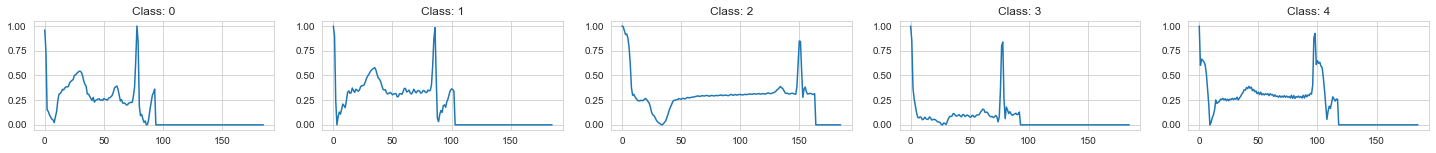

In [69]:
index = 0

fig, ax = plt.subplots(nrows = 1, ncols = 5, figsize=(25,2))

for i in range(5):
  ax[i].plot(test_data[test_data[187]==float(i)].sample(1).iloc[0,:186])
  ax[i].set_title('Class: '+str(i))

Testing The Model Against Completely Newly Seen Data - Test Set

In [70]:
X = test_data.drop([187],axis=1)
y = test_data[187]

In [71]:
X = np.array(X).reshape(X.shape[0], X.shape[1], 1)

In [72]:
y_pred = cnn.predict(X)
y_pred = [np.where(i == np.max(i))[0][0] for i in y_pred]

In [73]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y,y_pred)
print ("The Accuracy Score on test set is {:.2f}%".format(accuracy*100))

The Accuracy Score on test set is 92.12%


CONCLUSION- The Model has robust accuracy of ~ 92 %